## 대전시 공영자전거 위치 정보 시각화
- 2020년 8월 기준

### 1. tashu_20200801.csv 데이터 불러오기

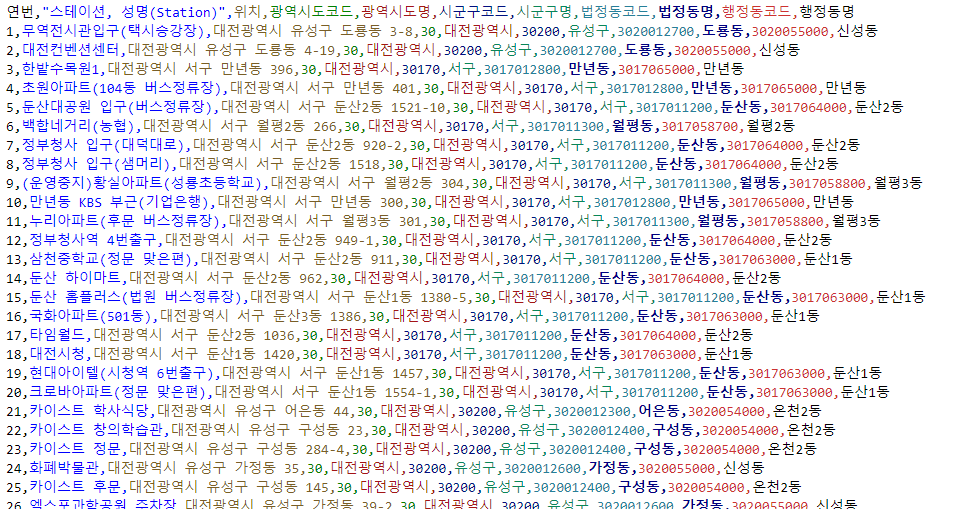

In [3]:
f = open('tashu_20200801.csv')
data = f.readlines()
f.close()
print(data)

['연번,"스테이션, 성명(Station)",위치,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명\n', '1,무역전시관입구(택시승강장),대전광역시 유성구 도룡동 3-8,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동\n', '2,대전컨벤션센터,대전광역시 유성구 도룡동 4-19,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동\n', '3,한밭수목원1,대전광역시 서구 만년동 396,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동\n', '4,초원아파트(104동 버스정류장),대전광역시 서구 만년동 401,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동\n', '5,둔산대공원 입구(버스정류장),대전광역시 서구 둔산2동 1521-10,30,대전광역시,30170,서구,3017011200,둔산동,3017064000,둔산2동\n', '6,백합네거리(농협),대전광역시 서구 월평2동 266,30,대전광역시,30170,서구,3017011300,월평동,3017058700,월평2동\n', '7,정부청사 입구(대덕대로),대전광역시 서구 둔산2동 920-2,30,대전광역시,30170,서구,3017011200,둔산동,3017064000,둔산2동\n', '8,정부청사 입구(샘머리),대전광역시 서구 둔산2동 1518,30,대전광역시,30170,서구,3017011200,둔산동,3017064000,둔산2동\n', '9,(운영중지)황실아파트(성룡초등학교),대전광역시 서구 월평2동 304,30,대전광역시,30170,서구,3017011300,월평동,3017058800,월평3동\n', '10,만년동 KBS 부근(기업은행),대전광역시 서구 만년동 300,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동\n', '11,누리아파트(후문 버스정류장),대전광역시 서구 월평3동 301,30,

### 2. 시군구 정보 추출하기

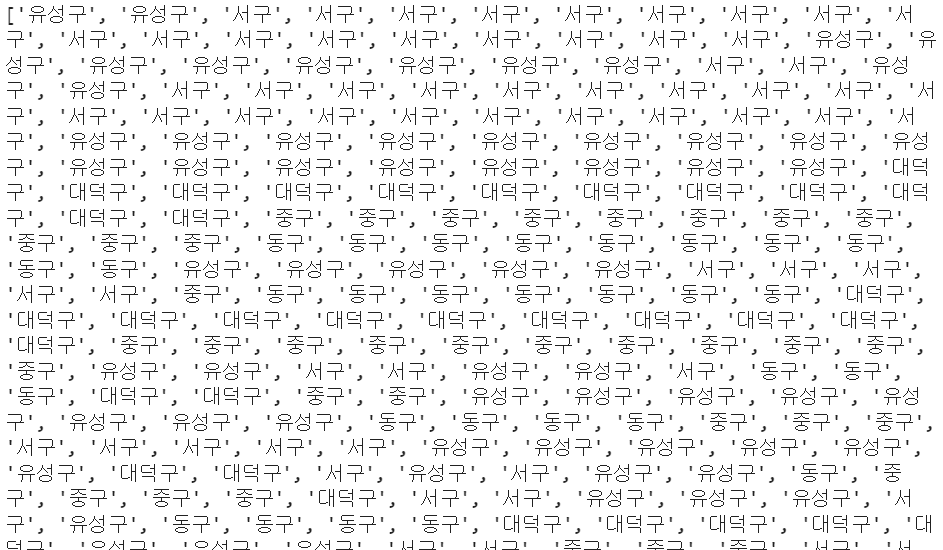

In [25]:
# date_list와 min_list 생성
시군구 =[]

# 반복문을 사용하여 각 데이터 저장
for d in data[1:]: #1번인덱스 한이유 위에 한글 '최저기온,지우려고
    시군구.append(d.split(',')[6]) #split => 구분자를 기준으로 리스트로 저장되니깐 [0]번인덱스가 날짜

시군구이름 = dict.fromkeys(시군구) #키값 뽑아내기 - 라벨에 넣어서 사용
시군구이름2 = list(시군구이름)
print(시군구이름2)


['유성구', '서구', '대덕구', '중구', '동구']


### 3. 시군구 데이터 개수 처리하기
- collections 모듈의 Counter 사용
- from collections import Counter

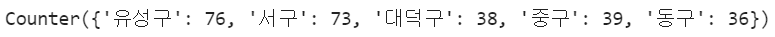

In [21]:
from collections import Counter
Counter(시군구)
values = Counter(시군구).values() #키에서 값만 뽑아내기
print(values)

dict_values([76, 73, 38, 39, 36])


### 4. matplotlib 한글 폰트 설정하기

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

### 5. 그래프 출력하기

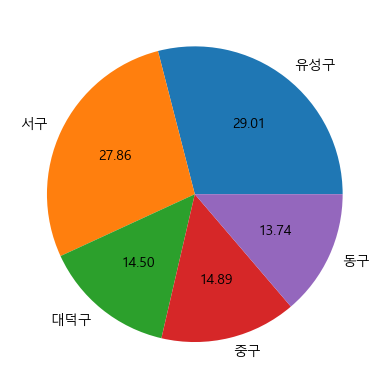

- Pie 그래프 사용
- plt.pie(출력될 값, labels=값에 대한 설명, autopct='%.2f')

([<matplotlib.patches.Wedge at 0x27276143c10>,
 [Text(0.6739892729605376, 0.8693321919347783, '유성구'),
  Text(-0.9935053643848883, 0.4721727342175217, '서구'),
  Text(-0.6946413733425902, -0.8529204901048634, '대덕구'),
  Text(0.26127668268098425, -1.0685197682248189, '중구'),
  Text(0.9990955474225488, -0.46022612607330077, '동구')],
 [Text(0.3676305125239296, 0.4741811956007881, '29.01'),
  Text(-0.5419120169372118, 0.2575487641186482, '27.86'),
  Text(-0.3788952945505037, -0.46522935823901634, '14.50'),
  Text(0.14251455418962777, -0.5828289644862648, '14.89'),
  Text(0.5449612076850265, -0.25103243240361856, '13.74')])

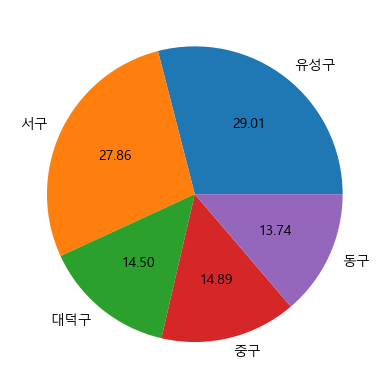

In [27]:
import matplotlib.pyplot as plt
plt.pie(values,labels=시군구이름2,autopct='%.2f')